# 🧱 LEGO Market Evolution Analysis (1949 — 2021)

### Executive Summary
This project analyzes 50+ years of LEGO set data sourced from [Rebrickable](https://rebrickable.com/downloads/) to identify long-term trends in:

* **Product Expansion:** Growth in annual set releases.
* **Theme Diversification:** The shift from core bricks to specialized categories.
* **Set Complexity:** Evolution of part counts over decades.
* **Licensing Strategy:** The impact of third-party IP (e.g., Star Wars) on growth.

**Goal:** To explore how LEGO evolved from producing a handful of simple brick sets in the 1950s to becoming a global entertainment brand with thousands of complex, licensed products.

<img src="https://i.imgur.com/49FNOHj.jpg">

### Database Schema
Before diving into the analysis, it's important to understand the relational structure of the Rebrickable dataset.

![Rebrickable Schema](../assets/rebrickable_schema.png)

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis  

# 🧱 Chapter 1: Product Variety — Color Diversity
We begin by examining LEGO’s color production scale to understand manufacturing diversity and product flexibility.


## 1️⃣ Dataset Overview: LEGO Colors

The dataset contains information about LEGO colors, including:

* **id** – unique color identifier
* **name** – color name
* **rgb** – hexadecimal color code
* **is_trans** – transparency indicator (`t` = transparent, `f` = opaque)

A preliminary inspection shows:

* **135 rows**
* **4 columns**

This suggests a broad color catalog. We next verify whether all rows represent unique colors.

In [2]:
# Using ../ to go up one level out of 'notebooks' and into 'data'
colors = pd.read_csv("../data/colors.csv")

In [3]:
# quick inspection
print(colors.shape)
print(colors.columns)
colors.head()

(135, 4)
Index(['id', 'name', 'rgb', 'is_trans'], dtype='str')


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 2️⃣ How Many Unique Colors Exist?

Using the `name` column, we calculate the number of distinct colors.

In [4]:
# method: if the column with colour names is 'name'
unique_count = colors['name'].nunique()
print("Unique colours:", unique_count)

Unique colours: 135


**Result:**

> LEGO has produced **135 unique colors**.

### 📌 Insight

This indicates:

- High manufacturing flexibility  
- Strong visual diversity in LEGO sets  
- Capability to support complex and creative designs  

## 🎨 3️⃣ Material Strategy: Transparent vs Opaque Colors

The `is_trans` column categorizes colors as:

* `f` → Opaque
* `t` → Transparent

We calculate the distribution using two methods to ensure consistency.

### Method 1: Using `groupby()`

In [5]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


### Method 2: Using `value_counts()`

In [6]:
colors.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

Both methods produce the same result, confirming accuracy.

## 4️⃣ Percentage Distribution

To better understand proportional representation, we calculate percentages.

In [7]:
trans_counts = colors['is_trans'].value_counts(normalize=True) * 100
trans_counts

is_trans
f    79.259259
t    20.740741
Name: proportion, dtype: float64

### 📌 Distribution Insight

* **Opaque colors dominate the palette (~79%)**
* **Transparent colors represent a smaller portion (~21%)**

This distribution suggests that LEGO prioritizes structural and foundational components in its manufacturing strategy. Transparent colors appear to be used more selectively for specialized design elements such as:

* Windows
* Lighting elements
* Water and fire effects
* Decorative detailing

## 🧠 Chapter 1 Conclusion

The LEGO color portfolio demonstrates:

* Strong emphasis on foundational, opaque building materials
* Strategic but limited use of transparent elements
* A manufacturing approach optimized for durability and versatility

This establishes a clear picture of LEGO’s product design philosophy before moving into broader dataset exploration.

# 🧱 Chapter 2: Understanding LEGO Themes vs. LEGO Sets
## Chapter Goal

In this chapter, we analyze the relationship between **LEGO themes** and **LEGO sets** to understand:

* When LEGO began releasing commercial sets
* How production volume evolved over time
* How theme diversity expanded
* Whether LEGO sets have become more complex

When you walk into a LEGO store, products are organized by **theme** — such as Star Wars, Batman, or Harry Potter. Each theme represents a product line, while individual retail boxes are called sets.

<img src="https://i.imgur.com/aKcwkSx.png">


## 🧩 LEGO Themes vs. LEGO Sets

A **LEGO set** is a specific retail product — a boxed build with a unique set number.

A **LEGO theme** is a broader product category that contains multiple related sets.

👉 One theme can contain dozens — or even hundreds — of sets over time.

<img src="https://i.imgur.com/whB1olq.png">


## 1️⃣ Dataset Overview: LEGO Sets

We begin by examining the `sets.csv` dataset, which contains information about individual LEGO products.

### Key Columns

* **set_num** – Unique identifier for each set
* **name** – Name of the set
* **year** – Release year
* **theme_id** – Theme classification ID
* **num_parts** – Number of pieces in the set

This dataset allows us to analyze:

* Production scale
* Thematic distribution
* Set complexity
* Historical growth

In [8]:
# load
sets = pd.read_csv("../data/sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


## 2️⃣ Historical Baseline: When Did LEGO First Release Sets?
To measure growth, we first identify LEGO’s earliest recorded commercial products.

In [10]:
sets.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


In [11]:
first_year = sets["year"].min()
first_sets = sets[sets["year"] == first_year]
first_sets.head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [12]:
first_sets.shape

(5, 5)

### 📌 Insight

* LEGO’s first recorded sets were released in **1949**
* **5 distinct products** were sold that year
* These early “Gift Sets” were simple and small in scale

This marks the beginning of LEGO’s commercial catalog and the foundation of its global expansion.

## 3️⃣ Evaluating Production Scale: Top 5 Sets by Part Count
To understand the upper limits of LEGO engineering, we identify the largest sets ever produced.

In [13]:
top_sets = sets.sort_values("num_parts", ascending=False).head(5)
top_sets[["set_num", "name", "num_parts"]]

,set_num,name,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,9987
11183,75192-1,UCS Millennium Falcon,7541
10551,71043-1,Hogwarts Castle,6020
295,10256-1,Taj Mahal,5923
221,10189-1,Taj Mahal,5922


### 📌 Insight

Modern flagship sets exceed **7,500+ parts**.

This reflects a strategic shift toward:

* Premium product positioning
* Highly complex builds
* Targeting adult collectors (AFOLs)
* Increased engineering sophistication

LEGO is no longer just a children's toy company — it also serves a serious collector market.

## 4️⃣ Time-Series Analysis: Sets Released Per Year
Next, we quantify year-over-year production growth.

In [14]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [15]:
sets_by_year.loc[[1955, 2019], 'set_num']

year
1955     28
2019    840
Name: set_num, dtype: int64

### 📌 Insight

* **1955:** 28 sets
* **2019:** 840 sets

LEGO’s annual production volume has expanded dramatically, reflecting:

* Global expansion
* Increased licensing
* Broader market segmentation

### 📊 Visualizing Production Growth
We exclude 2020 and 2021 to analyze only completed calendar years.

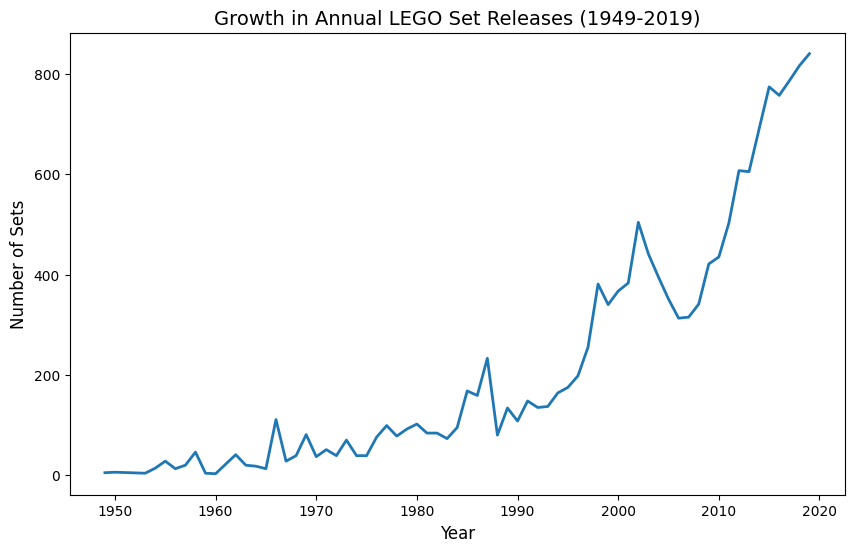

In [16]:
plt.figure(figsize=(10,6))
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], linewidth=2)

plt.title("Growth in Annual LEGO Set Releases (1949-2019)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Sets", fontsize=12)
plt.show();

### 📌 Insight

Production growth accelerates significantly after the 1990s.

## 5️⃣ Theme Growth Over Time

Now we examine how LEGO diversified its themes.

In [17]:
themes_by_year = sets.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year.rename(columns={"theme_id": "nr_themes"}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [18]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


### 📊 Line Chart: Theme Diversity

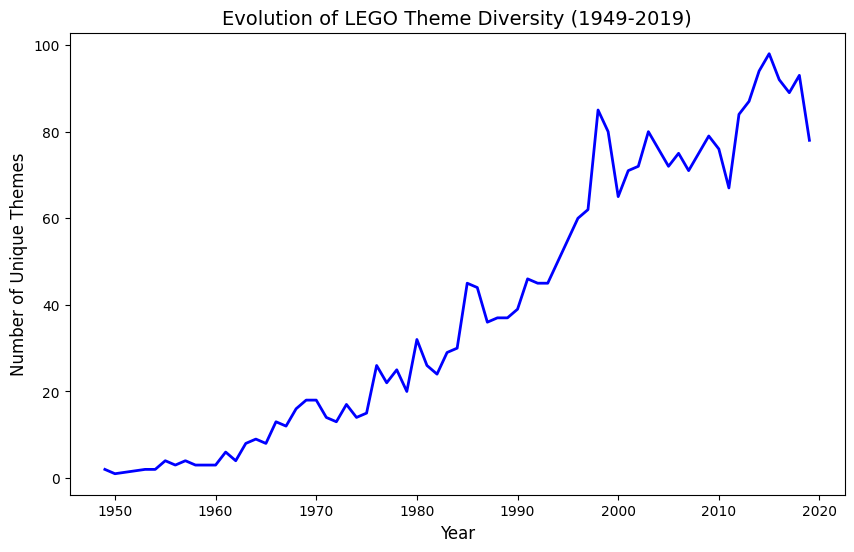

In [19]:
# Setting the figure size for better readability
plt.figure(figsize=(10,6))

# Slicing the data to exclude incomplete years (2020, 2021)
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='blue', linewidth=2)

# Adding professional labels and titles
plt.title("Evolution of LEGO Theme Diversity (1949-2019)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Unique Themes", fontsize=12)

# Display the plot without technical text output
plt.show();

### 📌 Insight

Theme diversity increases significantly in later decades, indicating:

* Strategic brand segmentation
* Licensing expansion
* Targeting multiple consumer niches

### 📊 Dual-Axis Visualization: Sets vs. Themes

To compare production scale and theme diversification:

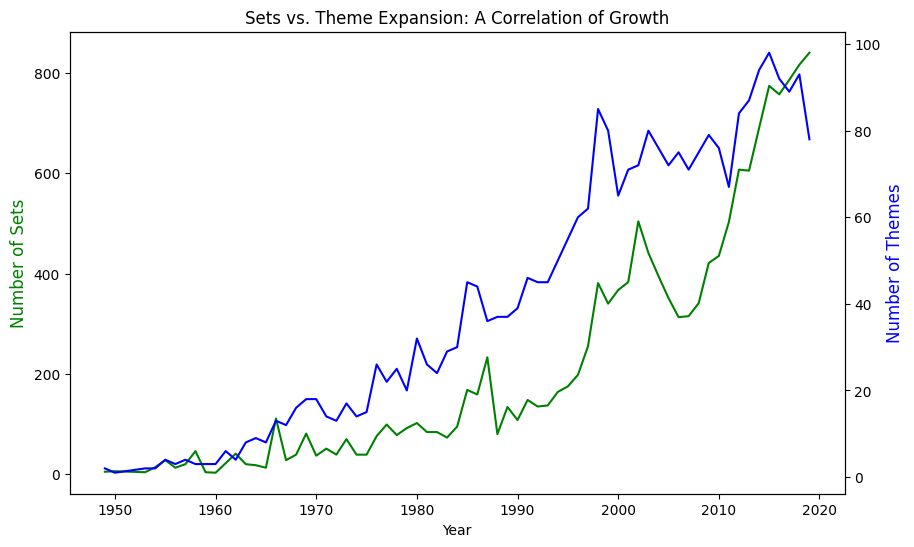

In [20]:
# Counting unique theme IDs per year using .agg()
themes_by_year = sets.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year.rename(columns={"theme_id": "nr_themes"}, inplace=True)

# Visualizing the relationship between Set Volume and Theme Variety
plt.figure(figsize=(10,6))
ax1 = plt.gca() 
ax2 = ax1.twinx() # Create a second y-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g', label='Sets')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='b', label='Themes')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green', fontsize=12)
ax2.set_ylabel('Number of Themes', color='blue', fontsize=12)

plt.title("Sets vs. Theme Expansion: A Correlation of Growth")
plt.show();

### 📌 Insight

This comparison reveals a strong correlation:

* As the number of themes increases
* The number of sets increases

Theme diversification appears to drive production growth.

## 6️⃣ Has LEGO Set Complexity Increased?
Finally, we examine whether sets have become more complex over time.

In [21]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.rename(columns={"num_parts": "average_num_parts"}, inplace=True)
parts_per_set.head()

,average_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [22]:
parts_per_set.tail()

,average_num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### 📊 Scatter Plot: Average Parts per Set

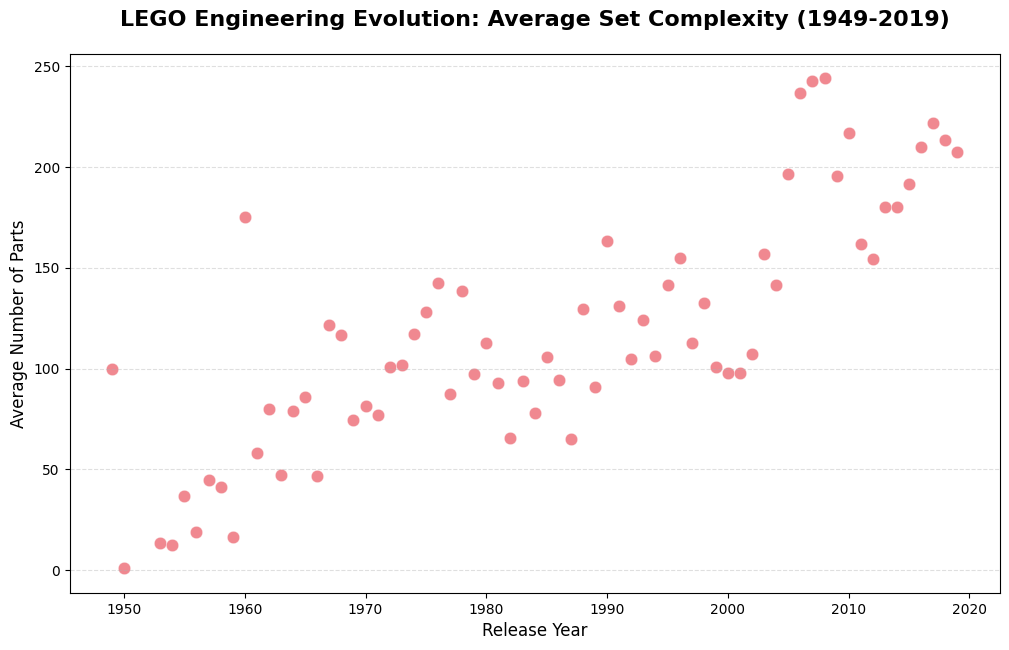

In [23]:
# 1. Setting the canvas size
plt.figure(figsize=(12, 7))

# 2. Plotting with transparency (alpha) and coloring
# Slicing [:-2] ensures we only show years with complete data
plt.scatter(parts_per_set.index[:-2], 
            parts_per_set["average_num_parts"][:-2], 
            color='#E63946',  # A strong, modern LEGO-red
            alpha=0.6,        # Helps see the density of points
            s=80,             # Increased point size for readability
            edgecolor='white',# Contrast against overlapping dots
            linewidth=0.5)

# 3. Adding annotations
plt.title("LEGO Engineering Evolution: Average Set Complexity (1949-2019)", 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Number of Parts", fontsize=12)

# 4. Adding a grid for easier value estimation
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show();

### 📌 Insight

The average number of parts per set has steadily increased.

This suggests:

* Greater structural complexity
* More advanced build techniques
* Stronger appeal to adult collectors
* Premium product development


## 🧠 Chapter 2 Conclusion

By the end of this chapter, we learned:

* LEGO began commercial production in **1949**
* Annual set releases grew from **dozens** to **hundreds**
* Theme diversity expanded dramatically over time
* Set complexity has increased significantly

Together, these trends show LEGO’s transformation from a small experimental toy manufacturer into a globally diversified, premium product company.

# 🧱 Chapter 3: Number of Sets per LEGO Theme

## Chapter Goal

In this chapter, we answer a key strategic question:

> **Which LEGO theme has produced the largest number of sets over time?**

LEGO has licensed major franchises — from *Harry Potter* to *Marvel Super Heroes* — alongside its own original themes. But which theme dominates in total production volume?

## 1️⃣ Counting Sets per Theme

We begin by counting how many sets belong to each `theme_id`.

In [24]:
set_theme_count = sets ["theme_id"].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

At this stage, we only see numeric IDs — not theme names.

To interpret this meaningfully, we need to connect `theme_id` to actual theme names.

## 2️⃣ Understanding the Database Schema

The dataset consists of two related tables:

### `sets.csv`

* Contains individual LEGO products
* Includes a `theme_id` column

### `themes.csv`

* Contains theme names
* Includes an `id` column
* Uses `parent_id` to create a hierarchy

This is a classic relational database structure:

* `sets.theme_id` → foreign key
* `themes.id` → primary key

We must **merge the two tables** to translate IDs into meaningful theme names.

<img src="https://i.imgur.com/Sg4lcjx.png">

## 3️⃣ Exploring the Themes Table

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

In [25]:
# Load the themes.csv
themes = pd.read_csv("../data/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


### 🔎 Important Observation

The `parent_id` column shows that themes are hierarchical.

For example:

* “Arctic Technic” is a sub-theme of “Technic”
* Some themes (like major franchises) may appear multiple times with different IDs

## 4️⃣ Case Study: “Star Wars” Theme

Let’s search for all entries named **Star Wars**:

In [26]:
themes[themes['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


### 📌 Insight

There are **four different theme IDs** labeled "Star Wars".

This happens because:

* LEGO organizes subcategories
* Special editions (e.g., Advent Calendars)
* Promotional series
* Parent-child relationships

This means counting by `theme_id` alone may fragment the total production of a franchise.

## 5️⃣ Matching Theme IDs Back to Sets

Now we examine sets under specific Star Wars theme IDs.

### Example: Theme ID 18

In [27]:
sets[sets['theme_id'] == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


These include:

* R2-D2 / C-3PO Droid Collectors Set
* Battle Droid
* Stormtrooper
* Darth Vader


### Example: Theme ID 209

In [28]:
sets[sets['theme_id'] == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


These include:

* Star Wars Advent Calendar (2013–2020)

### 📌 Insight

Different `theme_id`s represent:

* Core franchise releases
* Seasonal sub-lines
* Promotional editions

To fully understand a franchise’s dominance, we must consider this hierarchy.

## 6️⃣ Merging Sets and Themes

To identify which themes dominate overall production, we merge the counts with theme names.

In [29]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count})
set_theme_count.head()

,id,set_count
theme_id,,
158,158,753
501,501,656
494,494,398
435,435,356
503,503,329


In [30]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


### 📊 Visualizing the Top Themes

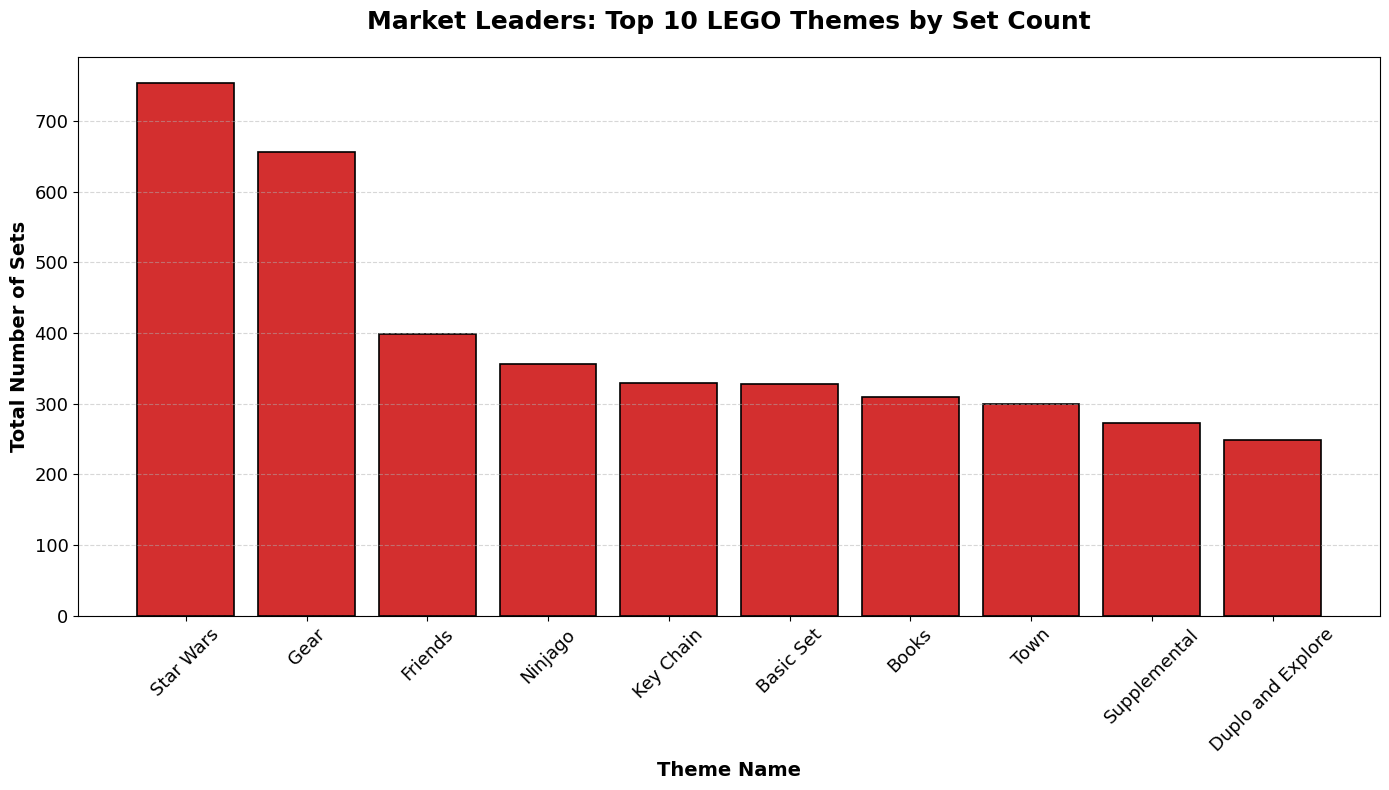

In [31]:
# 1. Setting the canvas
plt.figure(figsize=(14, 8))

# 2. Plotting with color and width
# We use merged_df.head(10) to ensure we are looking at the top leaders
plt.bar(merged_df.name[:10], 
        merged_df.set_count[:10],
        color='#D32F2F',
        edgecolor='black', 
        linewidth=1.2)

# 3. Refining the Labels and Title
plt.title("Market Leaders: Top 10 LEGO Themes by Set Count", fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Theme Name", fontsize=14, fontweight='bold')
plt.ylabel("Total Number of Sets", fontsize=14, fontweight='bold')

# 4. Cleaning up the ticks for maximum readability
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)

# 5. Adding a horizontal grid for value estimation 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 6. Display without technical noise
plt.tight_layout() # Ensures labels aren't cut off
plt.show();

### 📌 Insights

1. **Star Wars** dominates LEGO production history.
2. Licensed franchises are among the highest-producing themes.
3. Some high-ranking themes (e.g., Gear, Key Chain) represent merchandise extensions rather than core building sets.
4. Theme hierarchy can fragment counts across multiple IDs.


## 🧠 Chapter 3 Summary

By analyzing production counts by theme, we discovered:

* Certain franchises dominate LEGO’s product history.
* Star Wars is the most prolific theme by total number of sets.
* Theme hierarchies must be carefully handled to avoid misinterpretation.
* Merging relational data provides clearer business insights.
* Licensing is a major driver of production volume.
* Franchise-based themes significantly outperform many original LEGO themes.
* LEGO’s long-term growth strategy is strongly reinforced by entertainment licensing, which consistently produces high-volume, long-running themes.


# 🏆 Final Project Conclusion

Over the past seven decades, LEGO has transformed from a small manufacturer of simple brick sets into a globally recognized entertainment brand. By analyzing historical production data from the Rebrickable database, several clear strategic patterns emerge.

First, LEGO’s growth has been driven by **thematic diversification**. Rather than increasing output within a limited product range, the company expanded into new categories and demographics through the introduction of distinct themes. The strong relationship between the number of active themes and annual set releases suggests that innovation at the theme level is directly tied to production scale.

Second, the steady rise in **average part counts per set** reflects a deliberate move toward higher-complexity, premium products. This shift indicates an expansion beyond children’s toys into the Adult Fan of LEGO (AFOL) market, supporting higher price points and more sophisticated builds.

Finally, the dominance of licensed franchises — particularly Star Wars — highlights the strategic importance of intellectual property partnerships. After resolving theme hierarchies through relational merging, licensed entertainment properties clearly emerge as a major driver of production volume.

Overall, LEGO’s long-term expansion appears to rest on three reinforcing pillars:

* **Innovation through thematic expansion**
* **Premiumization via increasing product complexity**
* **Strategic licensing partnerships to accelerate scale**

This analysis demonstrates how structured data exploration and relational modeling can reveal the business strategy embedded within historical production data.